In [149]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check (1).csv


**REQUIRED** **LIBRYERS**

In [151]:
import pandas as pd 
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

Data Preprocessing 

In [152]:
Fraud_check_data = pd.read_csv("Fraud_check.csv")

In [154]:
Fraud_check_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [79]:
Fraud_check_data.shape

(600, 6)

In [155]:
Fraud_check_data.head

<bound method NDFrame.head of     Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..             

In [156]:
Fraud_check_data.info()            # list of the variable names with the data type it is 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [157]:
Fraud_check_data.isnull().sum()    # finding missing values are their are not 


Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [158]:
list(Fraud_check_data)

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

**DATA TRANSFORMATION**

Transforming from Categorical data to Numerical data

In [159]:
from sklearn import preprocessing 
lable_encoder = preprocessing.LabelEncoder()
Fraud_check_data["Undergrad"]=lable_encoder.fit_transform(Fraud_check_data["Undergrad"])
Fraud_check_data["Marital.Status"]=lable_encoder.fit_transform(Fraud_check_data["Marital.Status"])
Fraud_check_data["Urban"]=lable_encoder.fit_transform(Fraud_check_data["Urban"])

In [160]:
Fraud_check_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [161]:
Fraud_check_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [162]:
Fraud_check_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int64
 1   Marital.Status   600 non-null    int64
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int64
dtypes: int64(6)
memory usage: 28.2 KB


Transforming from Numerical data to Categorical data


In [163]:
def fun1(text):
    if text < 30000:       # # <= 30000 as "Risky" and others are "Good"
        return"Riskey"
    else:
        return"Good"

In [164]:
Fraud_check_data["Tax_In"]=Fraud_check_data["Taxable.Income"].apply(fun1)

In [165]:
Fraud_check_data["Tax_In"]

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Tax_In, Length: 600, dtype: object

In [166]:
Fraud_check_data["Tax_In"].value_counts()       # It counts number of Riskey and good 

Good      476
Riskey    124
Name: Tax_In, dtype: int64

**EXPLORATION DATA ANALYSIS**

**Scatter plot between the variables along with histograms
 **

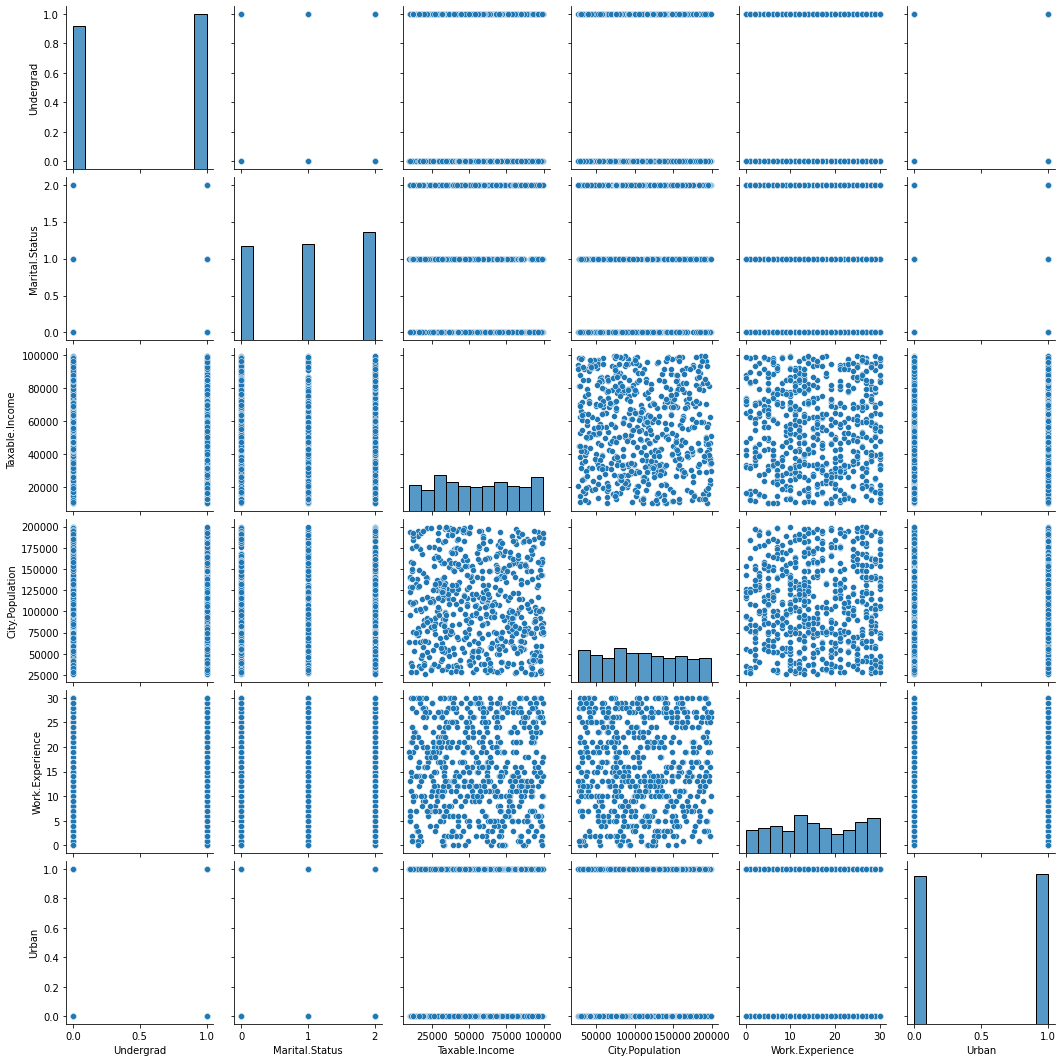

In [167]:
import seaborn as sns
sns.pairplot(Fraud_check_data)

SPLITTING THE DATE 

In [168]:
X = Fraud_check_data[Fraud_check_data.columns[[0,1,3,4,5]]]
X.info()                     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int64
 1   Marital.Status   600 non-null    int64
 2   City.Population  600 non-null    int64
 3   Work.Experience  600 non-null    int64
 4   Urban            600 non-null    int64
dtypes: int64(5)
memory usage: 23.6 KB


In [169]:
list(X)

['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience', 'Urban']

In [170]:
Y=Fraud_check_data["Tax_In"]
Y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Tax_In, Length: 600, dtype: object

**DATA PARTIATION**

In [171]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=20)

**RANDOM FOREST CLASSIFIER**

In [172]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_features=0.6, 
                        n_estimators=500)

In [173]:
RF.fit(X_train, Y_train)
Y_pred = RF.predict(X_test) 
metrics.accuracy_score(Y_test,Y_pred).round(2)

0.77

In [174]:
Y_pred_train=RF.predict(X_train)
Y_pred_test=RF.predict(X_test)

**CONFUSION MATRIX**

In [175]:
from sklearn import metrics

In [178]:
#TRAIN & TEST ACCURACY SCORES
print("Traning Accuracy:",metrics.accuracy_score(Y_train,Y_pred_train).round(2))
print("Test Accuracy:",metrics.accuracy_score(Y_test,Y_pred_test).round(2))

Traning Accuracy: 1.0
Test Accuracy: 0.77


In [179]:
# By applying the Randomforest classifier we could see that 77% accuracy with 60%
# of variables only used.

In [180]:
Traning_Accuracy=[]
Test_Accuracy=[]

In [181]:
for i in range(1,23):
    classifier = DecisionTreeClassifier(max_depth=i) 
    classifier.fit(X_train, Y_train)
    Y_pred_train = classifier.predict(X_train) 
    Y_pred_test = classifier.predict(X_test) 
    Traning_Accuracy.append(metrics.accuracy_score(Y_train, Y_pred_train).round(2))
    Test_Accuracy.append(metrics.accuracy_score(Y_test, Y_pred_test).round(2))

In [182]:
print(Traning_Accuracy)
print(Test_Accuracy)

[0.8, 0.8, 0.8, 0.81, 0.82, 0.83, 0.84, 0.86, 0.89, 0.9, 0.92, 0.94, 0.95, 0.96, 0.97, 0.98, 0.98, 0.99, 0.99, 1.0, 1.0, 1.0]
[0.78, 0.77, 0.78, 0.75, 0.76, 0.74, 0.75, 0.71, 0.67, 0.68, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.67, 0.66, 0.65, 0.64, 0.62]


In [183]:
# Above single decsion tree accuracies will not be stable for all the time
# So i implemented other models like bagging classifier and random forest classifier 
# to see stability of the performances and accuracyes scores that which model is giving
# the best accuracyes too be observe

**BAGGING CLASSIFIER**

In [184]:
from sklearn.ensemble import BaggingClassifier

In [185]:
classifier=DecisionTreeClassifier(criterion="gini",max_depth=5)

In [130]:
# classifier=DecisionTreeClassifier(criterion="entropy",max_depth=6)

In [187]:
bag=BaggingClassifier(base_estimator=classifier,
                      max_features=0.9,
                      max_samples=0.6,n_estimators=500)

In [188]:
bag.fit(X_train,Y_train)
Y_pred=bag.predict(X_test)
metrics.accuracy_score(Y_test, Y_pred).round(2)

0.78

In [189]:
# bagging with gini method we could see that same 78% accuracy as consistent
# bagging with entropy method we could see that 78% accuracy as consistent

**ADABOOST CLASSIFIER**

In [190]:
from sklearn.ensemble import AdaBoostClassifier

In [191]:
classifier=DecisionTreeClassifier(criterion="gini",max_depth=5)

In [192]:
# classifier=DecisionTreeClassifier(criterion="entropy",max_depth=6)

In [195]:
ABC= AdaBoostClassifier(learning_rate=0.001,n_estimators=500)

In [196]:
ABC.fit(X_train,Y_train)

AdaBoostClassifier(learning_rate=0.001, n_estimators=500)

In [197]:
Y_pred=ABC.predict(X_test)

In [199]:
from sklearn import metrics
metrics.accuracy_score(Y_pred,Y_test).round(3)

0.78

In [200]:
# By applying the AdaBoostClassifier we got accuracy score performance upto 78%. 

**CONCLUSION**

In [73]:
# By applying all the above methods we found that minimum complexity (60%) of  AdaBoostClassifier and 
# BaggingClassifierwe are getting as 78% accuracy score as the best 